# Analysis of Weather on Collisions in New York City: Regression Analysis

## Introduction

The collisions that occur on the streets of New York City (NYC) can be attributed to various causes, this including the weather conditions. Having conducted initial data analysis in Assignment 1, this report will delve further into the data. This will include building Regression models which will allow the relationship between the weather and the number of collisions that occurred on any given day in NYC to be modelled. Additionally, further variables analysed within Assignment 1 which were deemed relevant, including location, will be built into the model building.

This report will produce both Linear Regression and Deep Neural Network models, to establish the most accurate models for future use by the emergency services. This will allow for predicting the number of collisions on any given day, resulting in better preparation by the services.

# Methodology
The analysis will consist of building multiple regression models in Python (Python Software Foundation, 2024) using Tensorflow (Abadi et al., 2015) and the previously compiled and cleaned datasets from Assignment 1. Two types of regression analysis will be utilised; Linear Regression and Deep Neural Network. This will allow for analysis of variables with linear relationships as well as investigating further with additional variables through the Deep Neural Network. To conclude, the results of the models will be discussed and the most accurate models recommended for use by the emergency services.


## Linear Regression
For the Linear Regression analysis, multiple models will be built to allow for different scenarios to be investigated. This will primarily include conducting analysis on the Early period (2012-2019), the Late period (2020-2024) and the combined period (2012-2024), due to the differences in behaviour noted in Assignment 1 in the later years compared to early.
The Linear Regression analysis will incorporate variables identified during Assignment 1 as having a more linear relationship which includes Temperature, Wind Speed and Dew Point. Additionally, 'Day' and 'Year' will both be included in the analysis due to the linear relationships identified. Further models will be built with additional weather variables including Wind Gusts, Maximum Temperature and Minimum Temperature.

The Linear Regression Analysis will entail creating a dataframe, from the data created in Assignment 1, with all required variables for the model. Training and Test datasets will then be created where the Training dataset will contain 80% of the overall data and the Test data with the remaining 20%. Further subsets will be created for both Test and Training which will include only the Independent Variables, removing the Dependent Variable (Number of Collisions).  Standardisation will be applied in the form of scaling (dividing by 100) to improve the performance and accuracy of the models. Additionally, the Linear Regression Model will be built, the Training data will be used to train the model and the Mean Absolute Error (MAE) will be calculated to allow an assessment of how the model performs.

Finally, the Test data will be utilised to test the model, where the Actual vs Predicted Values will be plotted allowing visual analysis of the Model performance.  




## Deep Neural Network
The Deep Neural Network analysis will similarly be modelled for the Early, Late and Combined periods. However, this analysis will include more variables as it is not dependent on a Linear Relationship. As such, further weather variables will be incorporated as well as Day, Month and Year, and Latitude and Longitude. This will allow for time and location to be considered in building the relationship between weather and the number of collisions.
The process of building the DNN models will follow a similar process to that of the Linear Regression Models, however standardising will take place to a smaller degree due the closer range of values across the Independent and Dependent Variables, and Deep Neural Network Models will be built in place of the Linear models.

# Results

In [2]:
# import packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [3]:
#import datasets from Assignment 1
#combined clean dataset
clean = pd.read_csv('https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/assignment2_combinedclean.csv')
#early period (2012-19) clean dataset
early= pd.read_csv('https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/assignment2_combinedearly.csv')
#late period (2020-24) clean dataset
late = pd.read_csv('https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/assignment2_combinedlate.csv')
#location dataset
location = pd.read_csv('https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/Assignment_2_location.csv')

## Linear Regression Analysis

### All Data (2012-2024)

The initial Linear Regression model includes the following variables: Temperature, Wind Speed and Dew Point as weather variables, and Day and Year as additional Variables.

In [37]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
clean_data = [clean["day"], clean["temp"], clean["wdsp"], clean["dewp"], clean["year"], clean["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
clean_header = ["day", "temp", "wdsp", "dewp", "year", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
clean_input= pd.concat(clean_data, axis=1, keys=clean_header)

In [38]:
#training and test datasets
training_clean = clean_input.sample(frac=0.8, random_state=0)
test_clean = clean_input.drop(training_clean.index)

#copy files and remove output column
training_features = training_clean.copy()
test_features = test_clean.copy()

#independent variables only
training_labels = training_features.pop('NUM_COLLISIONS')
test_labels = test_features.pop('NUM_COLLISIONS')

# Apply Standardisation
training_labels= training_labels/100
test_labels = test_labels/100

#normalisation
normaliser_clean = tf.keras.layers.Normalization(axis=-1)
normaliser_clean.adapt(np.array(training_features))

#model 0 - clean data
model_0 = tf.keras.Sequential([
    normaliser_clean,
    layers.Dense(units=1)
])

model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')


In [52]:
#fit mode and run 100 times
%%time
history = model_0.fit(
    training_features,
    training_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

#evaluate model
mean_absolute_error_model_0 = model_0.evaluate(
    test_features,
    test_labels, verbose=0)

#print mean absolute error
print(mean_absolute_error_model_0)

0.8875871300697327
CPU times: user 15.4 s, sys: 826 ms, total: 16.2 s
Wall time: 16.4 s


The modelling presents a Mean Absolute Error (MAE) of 0.89, a reasonable level of error in the number of collisions. Due to the scaling applied, this would be an error of within 89 collisions of the true value.

In [53]:
#removing no. collisions from dataset
test_clean = test_clean.drop(columns=['NUM_COLLISIONS'])

#test data predictions
linear_day_predictions_0 = model_0.predict(test_clean)*100
print(linear_day_predictions_0)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[334.2329 ]
 [457.33374]
 [585.13367]
 [641.7909 ]
 [227.34981]
 [471.57025]
 [531.3991 ]
 [607.68994]
 [502.47278]
 [533.9898 ]
 [223.5451 ]
 [553.00757]
 [352.3529 ]
 [331.62717]
 [478.14236]
 [296.772  ]
 [645.1119 ]
 [564.1413 ]
 [318.42657]
 [490.82632]
 [512.0639 ]
 [473.1903 ]
 [581.55505]
 [477.31448]
 [530.5789 ]
 [364.4785 ]
 [438.993  ]
 [335.05527]
 [636.4204 ]
 [569.3926 ]
 [464.6256 ]
 [359.1748 ]
 [340.66473]
 [293.1627 ]
 [223.19963]
 [469.88693]
 [498.21786]
 [303.29962]
 [470.4368 ]
 [444.17844]
 [374.60507]
 [522.53955]
 [286.2358 ]
 [282.5605 ]
 [620.9549 ]
 [268.78406]
 [234.80014]
 [363.91498]
 [497.20264]
 [511.28116]
 [413.98605]
 [256.40213]
 [247.05882]
 [440.75903]
 [330.06238]
 [501.78867]
 [413.4095 ]
 [304.8157 ]
 [467.60245]
 [563.1282 ]
 [603.26605]
 [664.6834 ]
 [540.83826]
 [353.18497]
 [530.2059 ]
 [275.3731 ]
 [344.01093]
 [203.36562]
 [551.3884 ]
 [327.98212]
 [543.88684]
 [515.4938 ]
 [369.80322]
 [438.49002

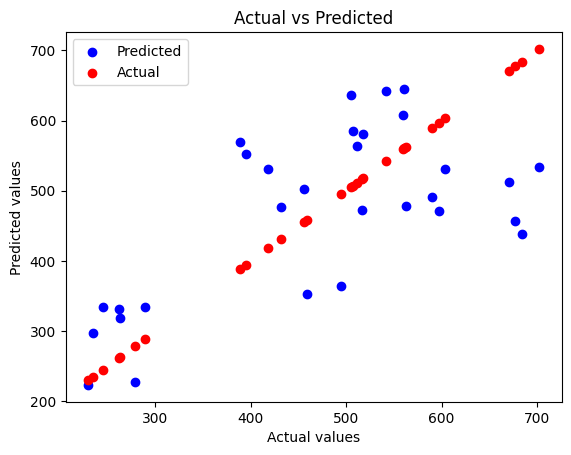

In [54]:
#create actual values
actual_values = test_labels[:30] * 100
# Compare predicted values with actual values - produce plot
plt.scatter(actual_values[:30], linear_day_predictions_0[:30], color='blue', label='Predicted')
plt.scatter(actual_values[:30], actual_values[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

Testing the model and plotting the results, the above shows the predicted vs actual values. The model shows scattering around the actual values at low and mid range, whilst sitting further away at the high values.

 A further model will be built below with additional variables including Wind Gusts and Max and Minimum Temperature to assess any impact on the model performance.

In [39]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
clean_data_ext = [clean["day"], clean["temp"], clean["wdsp"], clean["dewp"], clean["gust"], clean["max"], clean["min"],clean["year"], clean["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
clean_header_ext = ["day", "temp", "wdsp", "dewp", "gust", "max", "min", "year", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
clean_input_ext = pd.concat(clean_data, axis=1, keys=clean_header)

In [40]:
#training and test datasets
training_clean_ext = clean_input_ext.sample(frac=0.8, random_state=0)
test_clean_ext = clean_input_ext.drop(training_clean_ext.index)

#copy files and remove output column
training_features_ext = training_clean_ext.copy()
test_features_ext = test_clean_ext.copy()

#independent variables only
training_labels_ext = training_features_ext.pop('NUM_COLLISIONS')
test_labels_ext = test_features_ext.pop('NUM_COLLISIONS')

# Apply Standardisation
training_labels_ext= training_labels_ext/100
test_labels_ext = test_labels_ext/100

#normalisation
normaliser_clean_ext = tf.keras.layers.Normalization(axis=-1)
normaliser_clean_ext.adapt(np.array(training_features_ext))

#model 1 - produce model
model_1 = tf.keras.Sequential([
    normaliser_clean_ext,
    layers.Dense(units=1)
])

model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [56]:
#fit mode and run 100 times
%%time
history = model_1.fit(
    training_features_ext,
    training_labels_ext,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

#evaluate model
mean_absolute_error_model_1 = model_1.evaluate(
    test_features_ext,
    test_labels_ext, verbose=0)


#print mean absolute error
print(mean_absolute_error_model_1)

0.8901194930076599
CPU times: user 14.5 s, sys: 736 ms, total: 15.2 s
Wall time: 15.8 s


The addition of these variables results in a consistent level of error with the above model, computing a MAE of 0.89.

In [57]:
#removing no. collisions from dataset
test_clean_ext = test_clean_ext.drop(columns=['NUM_COLLISIONS'])

#test data predictions
linear_day_predictions_1 = model_1.predict(test_clean_ext)*100
print(linear_day_predictions_1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[336.53503]
 [465.82025]
 [595.3357 ]
 [639.5308 ]
 [229.69627]
 [482.74933]
 [551.86847]
 [619.80664]
 [509.9334 ]
 [546.3094 ]
 [226.15364]
 [565.43176]
 [357.7042 ]
 [336.41086]
 [482.01007]
 [295.64633]
 [657.04095]
 [576.45154]
 [325.86176]
 [494.06134]
 [516.981  ]
 [489.07718]
 [586.2469 ]
 [486.09897]
 [531.3441 ]
 [371.057  ]
 [448.40182]
 [337.96097]
 [647.24   ]
 [580.74225]
 [469.30127]
 [363.7362 ]
 [352.6492 ]
 [296.87323]
 [237.1282 ]
 [474.04352]
 [514.35034]
 [309.99164]
 [477.95004]
 [461.2514 ]
 [399.98517]
 [540.24854]
 [281.92535]
 [279.68942]
 [626.7345 ]
 [273.57788]
 [238.04553]
 [365.61182]
 [498.24713]
 [518.8244 ]
 [425.1195 ]
 [253.78918]
 [249.94328]
 [451.03302]
 [332.09357]
 [504.6056 ]
 [414.29938]
 [311.80774]
 [464.6669 ]
 [573.4372 ]
 [607.12683]
 [667.6417 ]
 [538.9287 ]
 [355.07132]
 [540.6107 ]
 [277.70596]
 [354.00916]
 [209.99217]
 [567.8294 ]
 [338.3271 ]
 [549.1103 ]
 [525.3253 ]
 [372.69107]
 [450.9489 

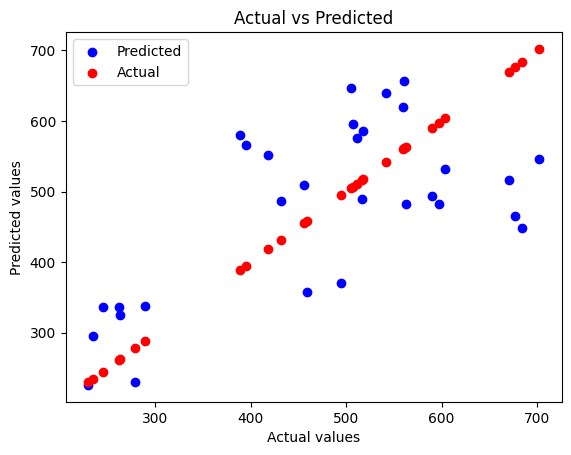

In [58]:
actual_values_ext = test_labels_ext[:30] * 100
# Compare predicted values with actual values
plt.scatter(actual_values_ext[:30], linear_day_predictions_1[:30], color='blue', label='Predicted')
plt.scatter(actual_values_ext[:30], actual_values_ext[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

Plotting the testing, the actual vs predicted results for this model presents very similar to the previous. Therefore, there appears to be no accuracy benefit in incorporating these additional variables, as such the models below will continue with the initial variables only.

### Early Period (2012-2019)

In [41]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
clean_data_early = [early["day"], early["temp"], early["wdsp"], early ["dewp"], early["year"], early["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
clean_header_early = ["day", "temp", "wdsp", "dewp", "year", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
clean_input_early= pd.concat(clean_data_early, axis=1, keys=clean_header_early)


In [42]:
#training and test datasets
training_clean_early = clean_input_early.sample(frac=0.8, random_state=0)
test_clean_early = clean_input_early.drop(training_clean_early.index)

#copy files and remove output column
training_features_early = training_clean_early.copy()
test_features_early = test_clean_early.copy()

#independent variables only
training_labels_early = training_features_early.pop('NUM_COLLISIONS')
test_labels_early = test_features_early.pop('NUM_COLLISIONS')

# standardisation
training_labels_early = training_labels_early/100
test_labels_early = test_labels_early/100

#normalisation
normaliser_early = tf.keras.layers.Normalization(axis=-1)
normaliser_early.adapt(np.array(training_features_early))

#model 2 - produce model
model_2 = tf.keras.Sequential([
    normaliser_early,
    layers.Dense(units=1)
])

model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [62]:
#fit mode and run 100 times
%%time
history = model_2.fit(
    training_features_early,
    training_labels_early,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

#evaluate model
mean_absolute_error_model_2 = model_2.evaluate(
    test_features_early,
    test_labels_early, verbose=0)

print(mean_absolute_error_model_2)

0.707452654838562
CPU times: user 12.4 s, sys: 591 ms, total: 13 s
Wall time: 16.6 s


Modelling the Early Period, the MAE is calculated at 0.71; a slight improvement on the overall dataset.



The plot below shows the actual vs predicted results identifying poorer performance of the model at higher and lower collisions rates, and overall showing a much shallower positive linear trend than the actual results.

In [63]:
#removing no. collisions from dataset
test_early = test_clean_early.drop(columns=['NUM_COLLISIONS'])

#test data predictions
linear_day_predictions_2 = model_2.predict(test_early)*100
print(linear_day_predictions_2)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[493.04538]
 [533.4806 ]
 [604.3768 ]
 [536.316  ]
 [560.1363 ]
 [551.38605]
 [608.3323 ]
 [576.2417 ]
 [533.97217]
 [509.7333 ]
 [536.01514]
 [548.31195]
 [593.41205]
 [501.1783 ]
 [609.9309 ]
 [645.9328 ]
 [514.9185 ]
 [531.04846]
 [606.13983]
 [529.76294]
 [641.78827]
 [620.6012 ]
 [558.17645]
 [621.4479 ]
 [519.1014 ]
 [550.8151 ]
 [534.22894]
 [567.8401 ]
 [522.2132 ]
 [622.09344]
 [542.1439 ]
 [562.3999 ]
 [496.51727]
 [633.118  ]
 [476.7343 ]
 [564.42847]
 [529.1703 ]
 [617.4812 ]
 [569.92114]
 [531.0554 ]
 [523.60095]
 [541.5683 ]
 [471.8668 ]
 [533.95245]
 [478.44943]
 [577.0852 ]
 [548.1966 ]
 [503.57913]
 [575.8842 ]
 [502.2359 ]
 [530.6958 ]
 [520.4894 ]
 [605.8834 ]
 [568.9614 ]
 [582.3705 ]
 [570.7882 ]
 [592.6532 ]
 [559.4366 ]
 [494.13336]
 [510.30713]
 [493.10242]
 [638.32825]
 [643.58685]
 [507.5725 ]
 [547.679  ]
 [489.36395]
 [558.54974]
 [557.05347]
 [572.39624]
 [593.496  ]
 [473.42972]
 [523.9927 ]
 [580.231  ]
 [560.549  ]

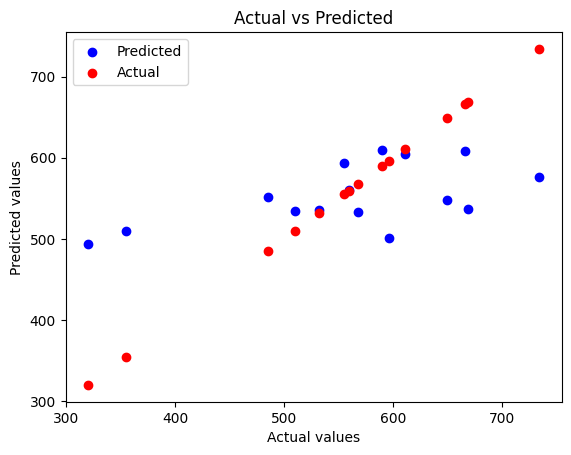

In [64]:
#create actual values
actual_values_early = test_labels_early[:15] * 100
# Compare predicted values with actual values - plot
plt.scatter(actual_values_early[:15], linear_day_predictions_2[:15], color='blue', label='Predicted')
plt.scatter(actual_values_early[:15], actual_values_early[:15], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

### Late Period (2020-2024)

In [65]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
clean_data_late = [late["day"], late["temp"], late["wdsp"], late ["dewp"], late["year"], late["NUM_COLLISIONS"]]
# create headers for our new dataframe. These should correlate with the above.
clean_header_late = ["day", "temp", "wdsp", "dewp", "year", "NUM_COLLISIONS"]
# create a final dataframe using our new dataframe and headers.
clean_input_late= pd.concat(clean_data_late, axis=1, keys=clean_header_late)

In [66]:
#training and test datasets
training_clean_late = clean_input_late.sample(frac=0.8, random_state=0)
test_clean_late = clean_input_late.drop(training_clean_late.index)

#copy files and remove output column
training_features_late = training_clean_late.copy()
test_features_late = test_clean_late.copy()

#independent variables only
training_labels_late = training_features_late.pop('NUM_COLLISIONS')
test_labels_late = test_features_late.pop('NUM_COLLISIONS')

# standardisation.
training_labels_late = training_labels_late/100
test_labels_late = test_labels_late/100

#normalisation
normaliser_late = tf.keras.layers.Normalization(axis=-1)
normaliser_late.adapt(np.array(training_features_late))

#model 3 - produce model
model_3 = tf.keras.Sequential([
    normaliser_late,
    layers.Dense(units=1)
])

model_3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [67]:
#fit mode and run 100 times
%%time
history = model_3.fit(
    training_features_late,
    training_labels_late,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

#evaluate model
mean_absolute_error_model_3 = model_3.evaluate(
    test_features_late,
    test_labels_late, verbose=0)

print(mean_absolute_error_model_3)

0.44270235300064087
CPU times: user 10.2 s, sys: 456 ms, total: 10.7 s
Wall time: 15.3 s


Building a model for the Late Period, a MAE of 0.44 concludes a much stronger model with an error of within 44 collisions as opposed to 71.

In [34]:
#removing no. collisions from dataset
test_late = test_clean_late.drop(columns=['NUM_COLLISIONS'])

#test data predictions
linear_day_predictions_3 = model_3.predict(test_late)*100
print(linear_day_predictions_3)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[325.344  ]
 [238.4432 ]
 [240.24142]
 [289.7892 ]
 [271.53296]
 [288.1818 ]
 [257.56073]
 [285.09305]
 [261.5201 ]
 [313.47092]
 [209.39703]
 [268.40363]
 [251.42111]
 [207.15395]
 [233.32741]
 [269.99048]
 [300.06833]
 [262.76328]
 [331.05215]
 [315.75308]
 [237.40854]
 [346.82895]
 [296.1588 ]
 [206.62126]
 [272.98538]
 [172.97456]
 [247.96979]
 [292.27542]
 [309.89108]
 [281.48013]
 [291.58798]
 [250.93562]
 [212.02989]
 [245.40588]
 [275.17853]
 [323.00177]
 [301.07153]
 [268.018  ]
 [333.6557 ]
 [342.92694]
 [342.22598]
 [260.8655 ]
 [219.95311]
 [343.8023 ]
 [341.30222]
 [295.72498]
 [268.4822 ]
 [252.29077]
 [263.60138]
 [226.95604]
 [271.63565]
 [237.61049]
 [336.29688]
 [231.83466]
 [275.3802 ]
 [330.04672]
 [290.22455]
 [356.3626 ]
 [290.34622]
 [324.94315]
 [286.9284 ]
 [315.9853 ]
 [264.36563]
 [315.13434]
 [301.4661 ]
 [281.02106]
 [188.09714]
 [222.9991 ]
 [357.9738 ]
 [317.19824]
 [301.14075]
 [271.4891 ]
 [237.64067]
 [233.11252]


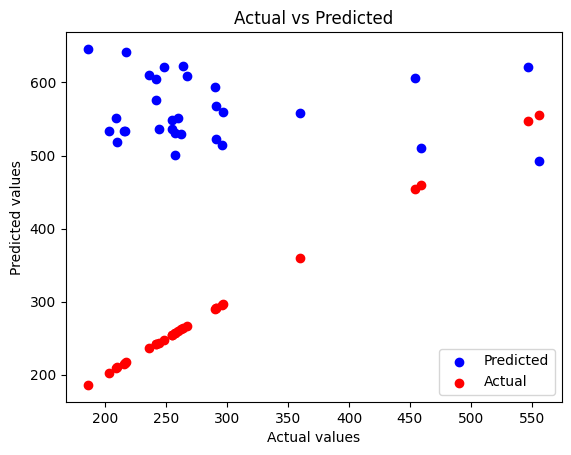

In [69]:
#calculate actual values
actual_values_late = test_labels_late[:30] * 100
# Compare predicted values with actual values - plot
plt.scatter(actual_values_late[:30], linear_day_predictions_2[:30], color='blue', label='Predicted')
plt.scatter(actual_values_late[:30], actual_values_late[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

A plot of the test data, above, shows the predictions to be far from the actual values at the low and mid range, whilst more consistent at the higher values.


## Deep Neural Network Analysis

The Deep Neural Network (DNN) analysis utilises the following weather variables: Temperature, Dew Point, Wind Speed, Fog, Visibility, Precipitation and Snow Depth. In addition, the Latitude and Longitude have been incorporated along with Day, Month and Year to improve the model.

### All Data (2012-2024)

In [122]:
#data merging - merge location and clean data files + clean

all_data = pd.merge(clean, location, on = 'collision_date', how='outer')

all_data = all_data.drop(columns = 'NUM_COLLISIONS')

all_data.dropna(inplace = True)

,Unnamed: 0,day,year,mo,da,collision_date,temp,dewp,slp,visib,...,max,min,prcp,sndp,fog,NUM_COLLISIONS,day_month,rounded_longitude,rounded_latitude,num_collisions
0,1632.0,2.0,2012.0,7.0,1.0,2012-07-01,83.6,63.0,1008.9,9.7,...,93.0,66.0,0.0,0.0,0.0,538.0,01-07,-74.2,40.5,7
1,1632.0,2.0,2012.0,7.0,1.0,2012-07-01,83.6,63.0,1008.9,9.7,...,93.0,66.0,0.0,0.0,0.0,538.0,01-07,-74.2,40.6,9
2,1632.0,2.0,2012.0,7.0,1.0,2012-07-01,83.6,63.0,1008.9,9.7,...,93.0,66.0,0.0,0.0,0.0,538.0,01-07,-74.1,40.6,13
3,1632.0,2.0,2012.0,7.0,1.0,2012-07-01,83.6,63.0,1008.9,9.7,...,93.0,66.0,0.0,0.0,0.0,538.0,01-07,-74.0,40.6,47
4,1632.0,2.0,2012.0,7.0,1.0,2012-07-01,83.6,63.0,1008.9,9.7,...,93.0,66.0,0.0,0.0,0.0,538.0,01-07,-74.0,40.7,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73500,NaN,NaN,NaN,NaN,NaN,2024-12-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.8,40.7,21
73501,NaN,NaN,NaN,NaN,NaN,2024-12-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.8,40.8,14
73502,NaN,NaN,NaN,NaN,NaN,2024-12-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.8,40.9,1
73503,NaN,NaN,NaN,NaN,NaN,2024-12-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.7,40.6,1


In [125]:
#create an aggregated dataset
average_collisions = all_data.groupby(['day', 'mo', 'year', 'temp', 'dewp', 'wdsp', 'fog', 'visib', 'prcp', 'sndp', 'rounded_latitude', 'rounded_longitude'])['num_collisions'].mean().reset_index()
#rename columns
average_collisions.rename(columns={'num_collisions':'avg_collisions',
                                   'rounded_latitude' : 'latitude',
                                   'rounded_longitude' : 'longitude'
                                   }, inplace = True)

In [12]:
#training and test datasets
training_collisions = average_collisions.sample(frac=0.8, random_state=0)
test_collisions  = average_collisions.sample(frac=0.2, random_state=0)

#create copies of datasets
training_features = training_collisions.copy()
test_features = test_collisions.copy()

#independent variables only
training_labels = training_features.pop('avg_collisions')
test_labels = test_features.pop('avg_collisions')

# standardisation.
training_labels = training_labels/10
test_labels = test_labels/10

#normalisation
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features))

#DNN Model - build
dnn_model_1 = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_1.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [13]:
#process model
%%time
history = dnn_model_1.fit(
    training_features,
    training_labels,
    validation_split=0.2,
    verbose=0,
    epochs=10)

#results
dnn_model_1_results = dnn_model_1.evaluate(test_features, test_labels, verbose=0)
print(dnn_model_1_results)

0.5288761258125305
CPU times: user 19.8 s, sys: 1.12 s, total: 20.9 s
Wall time: 20.9 s


The first DNN model, above, has included data across the entire period (2012-2024). This model produces an MAE of 0.53, which is an error of within 5.3 collisions.

In [23]:
#predictions model test
linear_predictions_all = dnn_model_1.predict(test_features[:30]) * 10
linear_predictions_all

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[ 7.0585846e+01],
       [ 5.0083775e+01],
       [ 7.9464172e+01],
       [ 7.9610054e+01],
       [ 6.5735031e+01],
       [ 6.8319283e+01],
       [ 1.2961482e+01],
       [ 5.8682255e+01],
       [ 2.5989132e+01],
       [ 7.6545799e+01],
       [ 4.2228119e+01],
       [ 8.5801661e-01],
       [ 3.0529375e+00],
       [ 6.5194216e+00],
       [ 9.7555418e+00],
       [ 3.0514027e+01],
       [ 6.9189781e+01],
       [ 1.5187134e+01],
       [ 8.9722404e+00],
       [ 1.3312863e+01],
       [-5.6691468e-02],
       [ 8.6883783e+00],
       [ 1.4769653e+01],
       [ 1.7776772e+01],
       [ 9.0697090e+01],
       [ 6.9012634e+01],
       [ 8.7152473e+01],
       [ 5.0837517e+00],
       [ 2.4052166e+01],
       [ 5.7645844e+01]], dtype=float32)

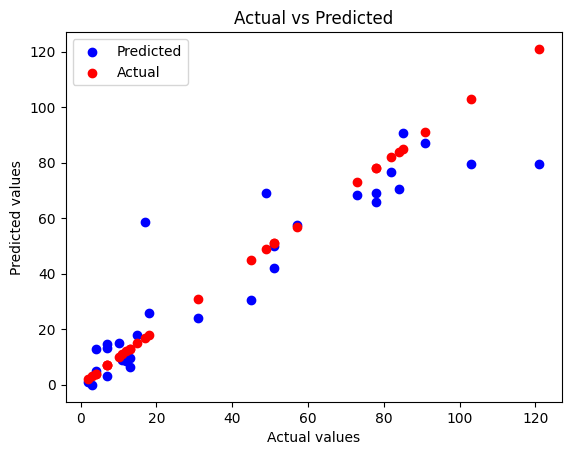

In [24]:
#compute actual values
actual_values = test_labels[:30] * 10

# Compare predicted values with actual values - plot
plt.scatter(actual_values[:30], linear_predictions_all, color='blue', label='Predicted')
plt.scatter(actual_values[:30], actual_values[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

Using the Test data, the plot above of Predicted and Actual collisions shows a close relationship at the low and mid values, with greater variation at the higher level. Overall, the level of error is acceptable across the range.

### Early Period (2012-2019)

Similar to the Linear Regression models, analysis of the early and late periods will allow for investigation over the models behaviour dependent on the time period.
The model below for the Early period (2012-2019) includes the same variables as the above model containing all data; Temperature, Dew point, Wind Speed, Fog, Visibility, Precipitation, Snow Depth and Latitude and Longitude.

In [14]:
#data merging - merge location and early data files + clean
early_data = pd.merge(early, location, on = 'collision_date', how='outer')

early_data = early_data.drop(columns = 'NUM_COLLISIONS')

early_data.dropna(inplace = True)

In [15]:
#create an aggregated dataset
average_collisions_early = early_data.groupby(['day', 'mo', 'year', 'temp', 'dewp', 'wdsp', 'fog', 'visib', 'prcp', 'sndp', 'rounded_latitude', 'rounded_longitude'])['num_collisions'].mean().reset_index()
#rename columns
average_collisions_early.rename(columns={'num_collisions':'avg_collisions',
                                   'rounded_latitude' : 'latitude',
                                   'rounded_longitude' : 'longitude'
                                   }, inplace = True)

In [17]:
#training and test datasets
early_training_collisions = average_collisions_early.sample(frac=0.8, random_state=0)
early_test_collisions = average_collisions_early.sample(frac=0.2, random_state=0)

early_training_features = early_training_collisions.copy()
early_test_features = early_test_collisions.copy()

early_training_labels = early_training_features.pop('avg_collisions')
early_test_labels = early_test_features.pop('avg_collisions')

# standardisation.
early_training_labels = early_training_labels/10
early_test_labels = early_test_labels/10

#normalisation
early_normaliser = tf.keras.layers.Normalization(axis=-1)
early_normaliser.adapt(np.array(early_training_features))

#DNN Model
dnn_model_2 = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [18]:
#process model
%%time
history = dnn_model_2.fit(
    early_training_features,
    early_training_labels,
    validation_split=0.2,
    verbose=0,
    epochs=10)

#results
dnn_model_2_results = dnn_model_2.evaluate(early_test_features, early_test_labels, verbose=0)
print(dnn_model_2_results)

0.5998671650886536
CPU times: user 12.8 s, sys: 692 ms, total: 13.5 s
Wall time: 14.6 s


With a MAE of 0.60, this has a greater level of error than the Combined data DNN model, however not significantly different.

In [25]:
linear_predictions_early = dnn_model_2.predict(early_test_features[:30]) *10
linear_predictions_early

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ 2.973866 ],
       [ 7.4784446],
       [64.64539  ],
       [22.50217  ],
       [ 6.8979764],
       [39.173782 ],
       [20.510073 ],
       [ 7.72558  ],
       [ 3.5711157],
       [ 8.892806 ],
       [82.81941  ],
       [12.68734  ],
       [ 1.370433 ],
       [ 4.7043495],
       [82.58107  ],
       [20.443962 ],
       [16.58163  ],
       [22.603819 ],
       [38.015007 ],
       [11.628867 ],
       [ 5.208868 ],
       [18.803421 ],
       [23.995396 ],
       [77.63551  ],
       [ 7.3962264],
       [ 5.792606 ],
       [49.32714  ],
       [65.715    ],
       [27.732656 ],
       [31.13431  ]], dtype=float32)

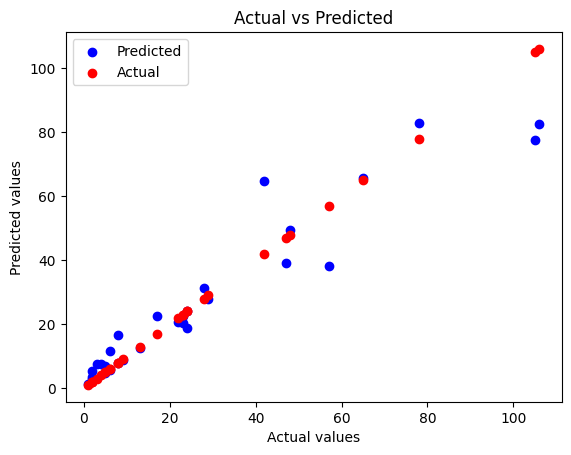

In [26]:
actual_values = early_test_labels[:30] *10

# Compare predicted values with actual values
plt.scatter(actual_values[:30], linear_predictions_early, color='blue', label='Predicted')
plt.scatter(actual_values[:30], actual_values[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

The level of error can be seen in the plot above, which confirms the similarity to the first DNN plot with a greater difference in actual and predicted values at the higher level. Overall the model is a relatively good fit.

### Late Period (2020-2024)

The Late Period (2020-2024) model contains consistent variables with the above Combined Data and Early Period models.

In [19]:
#data merging - merge location and late data files + clean
late_data = pd.merge(late, location, on = 'collision_date', how='outer')

late_data = late_data.drop(columns = 'NUM_COLLISIONS')

late_data.dropna(inplace = True)

In [20]:
#create an aggregated dataset
average_collisions_late = late_data.groupby(['day', 'mo', 'year', 'temp', 'dewp', 'wdsp', 'fog', 'visib', 'prcp', 'sndp', 'rounded_latitude', 'rounded_longitude'])['num_collisions'].mean().reset_index()
#rename columns
average_collisions_late.rename(columns={'num_collisions':'avg_collisions',
                                   'rounded_latitude' : 'latitude',
                                   'rounded_longitude' : 'longitude'
                                   }, inplace = True)

In [21]:
#training and test datasets
late_training_collisions = average_collisions_late.sample(frac=0.8, random_state=0)
late_test_collisions = average_collisions_late.sample(frac=0.2, random_state=0)

#copy datafiles
late_training_features = late_training_collisions.copy()
late_test_features = late_test_collisions.copy()

#independent variables only
late_training_labels = late_training_features.pop('avg_collisions')
late_test_labels = late_test_features.pop('avg_collisions')

# standardisation.
late_training_labels = late_training_labels/10
late_test_labels = late_test_labels/10

#normalisation
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(late_training_features))

#DNN Model
dnn_model_3 = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

dnn_model_3.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

In [22]:
#process model
%%time
history = dnn_model_3.fit(
    late_training_features,
    late_training_labels,
    validation_split=0.2,
    verbose=0,
    epochs=10)

#results
dnn_model_3_results = dnn_model_3.evaluate(late_test_features, late_test_labels, verbose=0)
print(dnn_model_3_results)

0.36072421073913574
CPU times: user 8.97 s, sys: 401 ms, total: 9.37 s
Wall time: 9.05 s


This model has an MAE of only 0.36 which is the best accuracy of all the models, presenting an error of within 3.6 collisions.

In [27]:
#predition testing
linear_predictions_late = dnn_model_3.predict(late_test_features[:30]) *10
linear_predictions_late

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ 2.1067076],
       [19.020876 ],
       [15.365981 ],
       [37.262817 ],
       [45.85166  ],
       [13.823542 ],
       [ 1.6076177],
       [12.717047 ],
       [ 2.216031 ],
       [ 9.897434 ],
       [52.63684  ],
       [ 3.7899723],
       [18.712437 ],
       [47.906418 ],
       [12.422143 ],
       [ 1.8777347],
       [17.189388 ],
       [ 2.4481864],
       [27.634884 ],
       [15.899014 ],
       [34.66745  ],
       [17.082895 ],
       [56.61338  ],
       [12.107889 ],
       [ 1.8714881],
       [46.91788  ],
       [ 4.8820953],
       [ 9.320439 ],
       [ 7.11191  ],
       [34.84765  ]], dtype=float32)

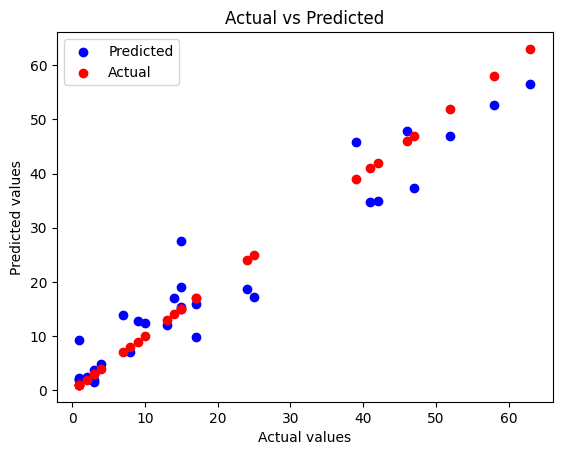

In [28]:
#calculate actual values
actual_values = late_test_labels[:30] *10

# Compare predicted values with actual values - plot
plt.scatter(actual_values[:30], linear_predictions_late, color='blue', label='Predicted')
plt.scatter(actual_values[:30], actual_values[:30], color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In the plot above, the test data confirms the accuracy of the model with minimal error between the Predicted and Actual values across the entire range. This suggests that the Late Period has the strongest and most accurate DNN model for use by the Emergency Services.

# Conclusions



## Discussions

After building the Linear Regression and DNN Models for Weather and Collisions in NYC, conclusions on the most appropriate models for the emergency services to use can been made. For the Linear Regression Model, as none of the weather variables had a strong Linear Correlation, the models are not the most accurate. Overall, the Linear Regression Model using the combined time period produced the lowest MAE, and therefore the most accurate model. This was reaffirmed from the output of the test data modelling where the Predicted and Actual values are mostly aligned, with greater variation at the higher values. As such, it would be suggested that the Emergency Services utilise this model for future use.

In regards to the Deep Neural Network Models, the models for all datasets were more accurate than the Linear Regression, with the Early Period data most inaccurate of the three. During testing, the combined data model showed greater variation at the higher values which is similarly seen with the Early Data model. Building the model with the Late period data produced the most accurate model, reconfirmed during testing with the predicted data across the entire range aligning with the actual values. Additionally, given that the Late Period is more recent data, this is more relevant data to use for future predictions in the coming years. This is particularly due to the vast difference in collisions noted in Assignment 1 between the Early and Late Period.

## Conclusion

In conclusion, the Emergency Services of NYC are being recommended to use the combined data Linear Regression model. This will allow accurate predictions to be made regarding the number of collisions that will occur on a given day of the week. However, for greater accuracy, due to the additional inputs to the model, and the use of more recent data only, the overall recommendation is for the Late Period Deep Neural Network model to be utilised. This will provide the most accurate predictions for a given day across the year, allowing for the better planning of resource to meet demand.

# Reference
Python Software Foundation (2024) Python programming language. Available at: https://www.python.org/ [Accessed 15 December 2024].

Abadi, M., Barham, P., Chen, J., Chen, Z., Davis, A., Dean, J., ... and Zheng, X., 2015. TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensorflow.org.

